In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

### Step 1: Load the Cancer dataset
- Use `from sklearn.datasets import load_breast_cancer`
- Split data into train and test sets, utilize `data` and `target` from the downloaded cancer dataset

In [8]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Step 2: Fitting the Tree Model
- Create a tree model with `max_depth=2`. Use `from sklearn.tree import DecisionTreeClassifier`
- Plot the tree with feature names. Use `from sklearn.tree import plot_tree`

In [10]:
# fit the tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'worst perimeter <= 112.8\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.5, 'worst concave points <= 0.146\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.06\nsamples = 260\nvalue = [8, 252]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]'),
 Text(0.75, 0.5, 'mean concave points <= 0.043\ngini = 0.106\nsamples = 142\nvalue = [134, 8]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.03\nsamples = 130\nvalue = [128, 2]')]

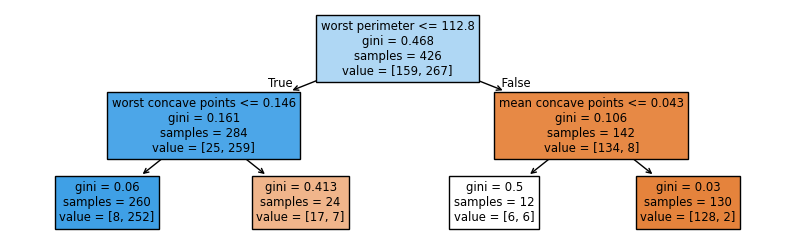

In [15]:
# visualize the tree
from sklearn.tree import plot_tree

plt.figure(figsize = (10, 3))

# plot_tree(dt)
# plot_tree(dt, feature_names=cancer.feature_names)
plot_tree(dt, feature_names=cancer.feature_names, filled=True)

### Step 3: Parameter Tuning
- Create a grtid search for `max_depth`. Use integer values from 1 to 6.
- Plot the mean train and test scores versus the maximum depth


### Step 4: Parameter Tuning
- Create a grtid search for `max_leaf_nodes`. Use integer values from 2 to 19.
- Plot the mean train and test scores versus the maximum depth


### Step 5: Extrapolation
- Read the dataset `ram_prices.csv`
- Plot the price versus year. Use logarithmic scale for the price.
- Create train and test datasets by splitting the data as train data being data before year 2000 and test data being data after year 2000
- Use price as the target variable. Take logarithm of the price.
- Train a tree and linear regression model
- Plot the train and test datasets as well as the predictions for the train dataset
- Plot the train and test datasets as well as the predictions for the the entire dataset


In [20]:
pr = pd.read_csv('ram_price.csv')
pr.columns

Index(['Unnamed: 0', 'date', 'price'], dtype='object')

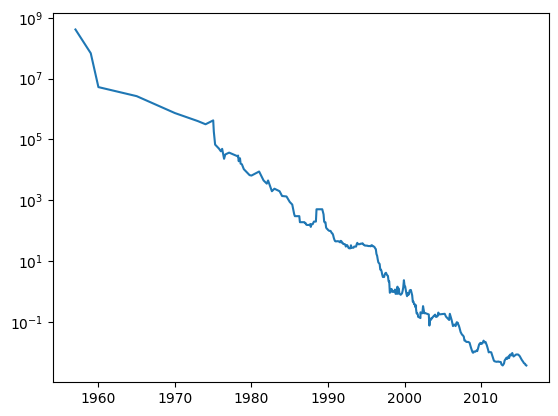

In [22]:
# plt.plot(pr.date, pr.price)
plt.semilogy(pr.date, pr.price)

In [24]:
X_train = pr[pr.date<2000].date

In [25]:
X_test = pr[pr.date>=2000].date

In [26]:
X_train.shape

(202,)

In [30]:
# sklearn not taking second dimentions, so will have to add new dimension/feature
X_train = np.array(X_train).reshape(X_train.shape[0], 1)
X_train.shape

(202, 1)

In [31]:
# y_train = pr[pr.date<2000].price
y_train = np.log(pr[pr.date<2000].price)

In [32]:
X_test = np.array(X_test).reshape(X_test.shape[0], 1)


In [33]:
y_test = np.log(pr[pr.date>=2000].price)

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# tree = DecisionTreeRegressor().fit(X_train, y_train)
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

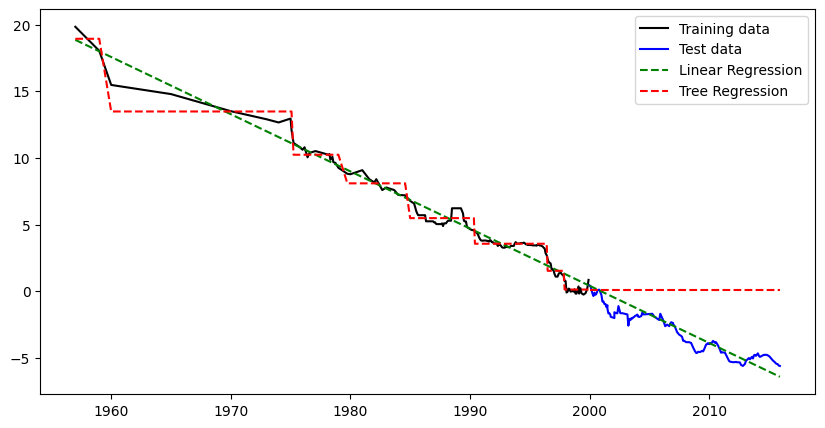

: 

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(X_train, y_train, label="Training data", c='k')
plt.plot(X_test, y_test, label="Test data", c='b')
plt.plot(X_train, lr.predict(X_train), '--', c='g', label='Linear Regression')
plt.plot(X_train, tree.predict(X_train), '--', c='r', label='Tree Regression')

plt.plot(X_test, lr.predict(X_test), '--', c='g')
plt.plot(X_test, tree.predict(X_test), '--', c='r')

plt.legend()


### Step 6: Feature Importance
- Load Iris dataset using `from sklearn.datasets import load_iris`
- Train a DT with `max_leaf_nodes=6`
- Plot the decision tree 
- Print the feature importance using `tree.feature_importances_`
- Create a bar graph for feature importance